In [1]:
#Importing the libraries for analysis
import pandas as pd
import numpy as np

In [2]:
#Importing the given dataset
dataframe = pd.read_csv("Uber Request Data.csv", sep = ",")
dataframe
#Need to solve the timestamp issue as some have '/' in between and some have '-'

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
#Checking the column types and size of the imported data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


# Performed the checking for the invalid values in the dataset using Microsoft Excel. Found no invalid values in the provided dataset.
# Hence not doing any checking related to invalid values here..
# -------------------------------------------------------------------------------------------------------------------

In [4]:
#Analyzing the number of nulls/NaNs
dataframe.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

# If the cab was not found, the number of nulls in column 'Driver id' should be same as in the 'Drop timestamp'
# But the analysis of the number of null values shows a different number in the two columns


In [5]:
#Analyzing the rows with null values in both 'Drop timestamp' and 'Driver id'
DataframeWithNulls = dataframe.loc[pd.isnull(dataframe['Drop timestamp']) & (~pd.isnull(dataframe['Driver id']))]
DataframeWithNulls
# help(pd.isnotnull())

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
2836,3806,Airport,2.0,Cancelled,13-07-2016 20:57:49,NaN
2837,4451,City,2.0,Cancelled,14-07-2016 08:38:38,NaN
2838,5023,Airport,2.0,Cancelled,14-07-2016 19:04:08,NaN
2839,80,City,3.0,Cancelled,11/7/2016 4:47,NaN
2840,534,City,3.0,Cancelled,11/7/2016 10:01,NaN


# The reason for the difference in number of null values in the columns 'Driver id' and 'Drop timestamp' is due to a number of rides being cancelled either by the driver or the customer

<br>
# Earlier I used the following approach to solve the timestamp formatting issue:
# - Filtered out the dataframes with hyphen(-), slash (/) separately
# - Used the pd.to_datetime() function with format as "%d-%M-%Y" for dataframe with timestamp containing '-'
# - Used the pd.to_datetime() function with format as "%d/%M/%Y" for dataframe with timestamp containing '/'
# - Concatenated the two dataframes and thus made 'Request timestamp' into a single format
# - Repeated all the above steps for 'Drop timestamp'
<br>
# Found a shorter way which I have used below:

In [6]:
#Making the request timestamp column in to a general format
finalDf = dataframe
finalDf['Request timestamp rectified'] = pd.to_datetime(dataframe['Request timestamp'], dayfirst = True)
finalDf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp rectified
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00


# Now, using the same logic for rectifying the Drop Timestamp


In [7]:
#Making the drop timestamp column in to a general format
finalDf['Drop timestamp rectified'] = pd.to_datetime(dataframe['Drop timestamp'], dayfirst = True)
finalDf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp rectified,Drop timestamp rectified
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00


In [8]:
#Verifying the existence of all the records 'finalDf' dataframe as in the original dataframe
len(finalDf) == len(dataframe)

True

# Now, using the same logic rectifying the Drop Timestamp


In [9]:
#Checking out the existence of all the records in all the three sub dataframes created for Drop Timestamp rectification
len(finalDf) == len(dataframe)

True

In [10]:
#Removing the unneccessary columns
# finalDf.columns
finalDf.drop(['Request timestamp','Drop timestamp'], inplace = True, axis = 1)

In [11]:
finalDf

,Request id,Pickup point,Driver id,Status,Request timestamp rectified,Drop timestamp rectified
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [12]:
#Checking for the duplicate values in columns
finalDf[finalDf.duplicated(['Request id'], keep = False)]

,Request id,Pickup point,Driver id,Status,Request timestamp rectified,Drop timestamp rectified


# As should be the ideal case, every request ID is unique in the dataset

In [13]:
finalDf[finalDf.duplicated(['Driver id'], keep = False)]

,Request id,Pickup point,Driver id,Status,Request timestamp rectified,Drop timestamp rectified
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


# As we see from the above results that the lenght of the results received on checking the duplicates on 'driver id' gives us all the rows of the dataset. Thus, all the 'driver ids' appear more than once in the dataset. Hence, every driver has got at least two rides

In [14]:
#Checking the duplicacy on the Request timestamp as there must be more than one request at any given time keeping in mind the huge customer base of UBER
finalDf[finalDf.duplicated('Request timestamp rectified', keep = False)].sort_values(by = 'Request timestamp rectified')

,Request id,Pickup point,Driver id,Status,Request timestamp rectified,Drop timestamp rectified
3791,1365,City,229.0,Cancelled,2016-07-11 00:09:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4100,6,City,NaN,No Cars Available,2016-07-11 00:36:00,NaT
2506,5,Airport,264.0,Trip Completed,2016-07-11 00:36:00,2016-07-11 01:35:00
1144,13,City,119.0,Trip Completed,2016-07-11 01:08:00,2016-07-11 01:58:00
4103,12,City,NaN,No Cars Available,2016-07-11 01:08:00,NaT
3669,18,City,201.0,Cancelled,2016-07-11 01:16:00,NaT
4108,17,Airport,NaN,No Cars Available,2016-07-11 01:16:00,NaT
4115,26,Airport,NaN,No Cars Available,2016-07-11 01:49:00,NaT
4114,27,Airport,NaN,No Cars Available,2016-07-11 01:49:00,NaT


# As seen in the above results, its perfectly fine to have multiple status on the same request timestamp which somehow proves the validity of the dataset 

In [15]:
#Deriving the RequestTimestamp into sub columns as Date, Time, Day, Hour
finalDf['Request date'] = finalDf['Request timestamp rectified'].dt.date
finalDf['Request time'] = finalDf['Request timestamp rectified'].dt.time
finalDf['Request hour'] = finalDf['Request timestamp rectified'].dt.hour
finalDf['Request day'] = finalDf['Request timestamp rectified'].dt.day
finalDf['Request dayOfWeek'] = finalDf['Request timestamp rectified'].dt.dayofweek
finalDf

,Request id,Pickup point,Driver id,Status,Request timestamp rectified,Drop timestamp rectified,Request date,Request time,Request hour,Request day,Request dayOfWeek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,12,1
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,12,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,13,2
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,13,2
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,14,3
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,15,4
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,15,4
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,11,0


In [16]:
#Deriving the DropTimestamp into sub columns as Date, Time, Day, Hour
finalDf['Drop date'] = finalDf['Drop timestamp rectified'].dt.date
finalDf['Drop time'] = finalDf['Drop timestamp rectified'].dt.time
finalDf['Drop hour'] = finalDf['Drop timestamp rectified'].dt.hour
finalDf['Drop day'] = finalDf['Drop timestamp rectified'].dt.day
finalDf['Drop dayOfWeek'] = finalDf['Drop timestamp rectified'].dt.dayofweek
finalDf

,Request id,Pickup point,Driver id,Status,Request timestamp rectified,Drop timestamp rectified,Request date,Request time,Request hour,Request day,Request dayOfWeek,Drop date,Drop time,Drop hour,Drop day,Drop dayOfWeek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11,0,2016-07-11,13:00:00,13.0,11.0,0.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,11,0,2016-07-11,18:47:00,18.0,11.0,0.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,12,1,2016-07-12,09:58:00,9.0,12.0,1.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,12,1,2016-07-12,22:03:00,22.0,12.0,1.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,13,2,2016-07-13,09:25:47,9.0,13.0,2.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,13,2,2016-07-13,22:28:59,22.0,13.0,2.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,14,3,2016-07-14,07:13:15,7.0,14.0,3.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,15,4,2016-07-15,06:07:52,6.0,15.0,4.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,15,4,2016-07-15,18:50:51,18.0,15.0,4.0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,11,0,2016-07-11,07:25:00,7.0,11.0,0.0


In [17]:
#Checking the number of nulls in the final Dataframe 
#The number of nulls in all the columns derived from the 'drop timestamp rectified' must be same as the number of nulls in 'drop timestamp rectified'
finalDf.isnull().sum()

Request id                        0
Pickup point                      0
Driver id                      2650
Status                            0
Request timestamp rectified       0
Drop timestamp rectified       3914
Request date                      0
Request time                      0
Request hour                      0
Request day                       0
Request dayOfWeek                 0
Drop date                      3914
Drop time                      3914
Drop hour                      3914
Drop day                       3914
Drop dayOfWeek                 3914
dtype: int64

In [18]:
#Checking the column types
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 16 columns):
Request id                     6745 non-null int64
Pickup point                   6745 non-null object
Driver id                      4095 non-null float64
Status                         6745 non-null object
Request timestamp rectified    6745 non-null datetime64[ns]
Drop timestamp rectified       2831 non-null datetime64[ns]
Request date                   6745 non-null object
Request time                   6745 non-null object
Request hour                   6745 non-null int64
Request day                    6745 non-null int64
Request dayOfWeek              6745 non-null int64
Drop date                      2831 non-null object
Drop time                      2831 non-null object
Drop hour                      2831 non-null float64
Drop day                       2831 non-null float64
Drop dayOfWeek                 2831 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(

In [19]:
finalDf

,Request id,Pickup point,Driver id,Status,Request timestamp rectified,Drop timestamp rectified,Request date,Request time,Request hour,Request day,Request dayOfWeek,Drop date,Drop time,Drop hour,Drop day,Drop dayOfWeek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11,0,2016-07-11,13:00:00,13.0,11.0,0.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,11,0,2016-07-11,18:47:00,18.0,11.0,0.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,12,1,2016-07-12,09:58:00,9.0,12.0,1.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,12,1,2016-07-12,22:03:00,22.0,12.0,1.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,13,2,2016-07-13,09:25:47,9.0,13.0,2.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,13,2,2016-07-13,22:28:59,22.0,13.0,2.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,14,3,2016-07-14,07:13:15,7.0,14.0,3.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,15,4,2016-07-15,06:07:52,6.0,15.0,4.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,15,4,2016-07-15,18:50:51,18.0,15.0,4.0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,11,0,2016-07-11,07:25:00,7.0,11.0,0.0


In [20]:
#Checking the need for converting pickup point to lower case
finalDf.groupby('Pickup point').sum()

,Request id,Driver id,Request hour,Request day,Request dayOfWeek,Drop hour,Drop day,Drop dayOfWeek
Pickup point,,,,,,,,
Airport,11188750,222926.0,50189,41947,6329,17020.0,17187.0,2590.0
City,11640680,389282.0,37204,45812,7235,19440.0,19602.0,3058.0


# As we see only two rows that too with unique values, thus there's no need to convert 'Pickup point' to lowercase

In [21]:
#UDF to allot each time to categories of the day i.e EarlyMorning, Morning, Evening, Afternoon
import datetime as dt
def allotTimeslot(time):
    currentTime = time #etime.strptime(time,"%H:%M:%S")
    MorningStartTime = dt.datetime.strptime("05:00:00","%H:%M:%S").time()
    AfternoonStartTime = dt.datetime.strptime("12:00:00","%H:%M:%S").time()
    EveningStartTime = dt.datetime.strptime("17:00:00","%H:%M:%S").time()
    NightStartTime = dt.datetime.strptime("22:00:00","%H:%M:%S").time()
    LateNightStartTime = dt.datetime.strptime("01:00:00","%H:%M:%S").time()
    
    if((currentTime >= MorningStartTime) & (currentTime < AfternoonStartTime)):
        return "Morning"
    elif((currentTime >= AfternoonStartTime) & (currentTime < EveningStartTime)):
        return "Afternoon"
    elif((currentTime >= EveningStartTime) & (currentTime < NightStartTime)):
        return "Evening"
    elif((currentTime >= NightStartTime) | (currentTime < LateNightStartTime)):
        return "Night"    
    elif((currentTime >= LateNightStartTime) | (currentTime < MorningStartTime)):
        return "Late Night"

In [22]:
#Adding another column to add timeslot of the day
finalDf['RequestTimeSlotCategory'] = finalDf['Request time'].apply(allotTimeslot)
finalDf

,Request id,Pickup point,Driver id,Status,Request timestamp rectified,Drop timestamp rectified,Request date,Request time,Request hour,Request day,Request dayOfWeek,Drop date,Drop time,Drop hour,Drop day,Drop dayOfWeek,RequestTimeSlotCategory
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11,0,2016-07-11,13:00:00,13.0,11.0,0.0,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,11,0,2016-07-11,18:47:00,18.0,11.0,0.0,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,12,1,2016-07-12,09:58:00,9.0,12.0,1.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,12,1,2016-07-12,22:03:00,22.0,12.0,1.0,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,13,2,2016-07-13,09:25:47,9.0,13.0,2.0,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,13,2,2016-07-13,22:28:59,22.0,13.0,2.0,Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,14,3,2016-07-14,07:13:15,7.0,14.0,3.0,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,15,4,2016-07-15,06:07:52,6.0,15.0,4.0,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,15,4,2016-07-15,18:50:51,18.0,15.0,4.0,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,11,0,2016-07-11,07:25:00,7.0,11.0,0.0,Morning


In [23]:
#Checking the Time slot mapping on the 'Request Timestamp' column
finalDf[['Request time','RequestTimeSlotCategory']]

,Request time,RequestTimeSlotCategory
0,11:51:00,Morning
1,17:57:00,Evening
2,09:17:00,Morning
3,21:08:00,Evening
4,08:33:16,Morning
5,21:57:28,Evening
6,06:15:32,Morning
7,05:11:52,Morning
8,17:57:27,Evening
9,06:46:00,Morning


In [24]:
# Checking the function returning appropriate category according to the input time
print(allotTimeslot(dt.datetime.strptime("04:59:59","%H:%M:%S").time()))
print(allotTimeslot(dt.datetime.strptime("05:00:00","%H:%M:%S").time()))
print(allotTimeslot(dt.datetime.strptime("10:00:00","%H:%M:%S").time()))
print(allotTimeslot(dt.datetime.strptime("06:00:00","%H:%M:%S").time()))
print(allotTimeslot(dt.datetime.strptime("22:00:00","%H:%M:%S").time()))
print(allotTimeslot(dt.datetime.strptime("00:00:00","%H:%M:%S").time()))
print(allotTimeslot(dt.datetime.strptime("23:59:59","%H:%M:%S").time()))
print(allotTimeslot(dt.datetime.strptime("01:00:00","%H:%M:%S").time()))

Late Night
Morning
Morning
Morning
Night
Night
Night
Late Night


In [25]:
# Checking all the categories being present and no extra value in the RequestTimeSlotCategory column
finalDf.groupby('RequestTimeSlotCategory').sum()

,Request id,Driver id,Request hour,Request day,Request dayOfWeek,Drop hour,Drop day,Drop dayOfWeek
RequestTimeSlotCategory,,,,,,,,
Afternoon,2743357,87141.0,11301,10528,1618,7252.0,6304.0,903.0
Evening,8677330,141228.0,44542,30444,4682,15551.0,10200.0,1576.0
Late Night,1373282,34417.0,1371,6267,998,682.0,2268.0,354.0
Morning,7653895,300710.0,19029,32693,5006,9313.0,14031.0,2096.0
Night,2381566,48712.0,11150,7827,1260,3662.0,3986.0,719.0


In [26]:
#Dropping the unnecessary columns
finalDf.drop(['Request timestamp rectified','Drop timestamp rectified'],axis = 1, inplace = True)

In [27]:
# Function to get the commute time from the city to airport and vice versa
def getCommuteTime(dateA,dateB,timeA,timeB):
    return round((dt.datetime.combine(dateB,timeB) - dt.datetime.combine(dateA,timeA)).total_seconds()/60,0)

In [28]:
# Creating a new column which will store the time taken to move from airport to city and vice-versa
finalDf['Commute time minutes'] = finalDf.loc[~pd.isnull(finalDf['Drop date'])].apply(lambda x: getCommuteTime(x['Request date'],x['Drop date'],x['Request time'],x['Drop time']), axis =1)
finalDf

,Request id,Pickup point,Driver id,Status,Request date,Request time,Request hour,Request day,Request dayOfWeek,Drop date,Drop time,Drop hour,Drop day,Drop dayOfWeek,RequestTimeSlotCategory,Commute time minutes
0,619,Airport,1.0,Trip Completed,2016-07-11,11:51:00,11,11,0,2016-07-11,13:00:00,13.0,11.0,0.0,Morning,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11,17:57:00,17,11,0,2016-07-11,18:47:00,18.0,11.0,0.0,Evening,50.0
2,1807,City,1.0,Trip Completed,2016-07-12,09:17:00,9,12,1,2016-07-12,09:58:00,9.0,12.0,1.0,Morning,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12,21:08:00,21,12,1,2016-07-12,22:03:00,22.0,12.0,1.0,Evening,55.0
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,8,13,2,2016-07-13,09:25:47,9.0,13.0,2.0,Morning,53.0
5,3879,Airport,1.0,Trip Completed,2016-07-13,21:57:28,21,13,2,2016-07-13,22:28:59,22.0,13.0,2.0,Evening,32.0
6,4270,Airport,1.0,Trip Completed,2016-07-14,06:15:32,6,14,3,2016-07-14,07:13:15,7.0,14.0,3.0,Morning,58.0
7,5510,Airport,1.0,Trip Completed,2016-07-15,05:11:52,5,15,4,2016-07-15,06:07:52,6.0,15.0,4.0,Morning,56.0
8,6248,City,1.0,Trip Completed,2016-07-15,17:57:27,17,15,4,2016-07-15,18:50:51,18.0,15.0,4.0,Evening,53.0
9,267,City,2.0,Trip Completed,2016-07-11,06:46:00,6,11,0,2016-07-11,07:25:00,7.0,11.0,0.0,Morning,39.0


In [29]:
#Checking for null(s) if any
finalDf.isnull().sum()

Request id                    0
Pickup point                  0
Driver id                  2650
Status                        0
Request date                  0
Request time                  0
Request hour                  0
Request day                   0
Request dayOfWeek             0
Drop date                  3914
Drop time                  3914
Drop hour                  3914
Drop day                   3914
Drop dayOfWeek             3914
RequestTimeSlotCategory       0
Commute time minutes       3914
dtype: int64

In [30]:
#Checking the number of rows present in the current dataframe as in the original one it was 6745
len(finalDf)

6745

In [31]:
#Importing libraries for plotting
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

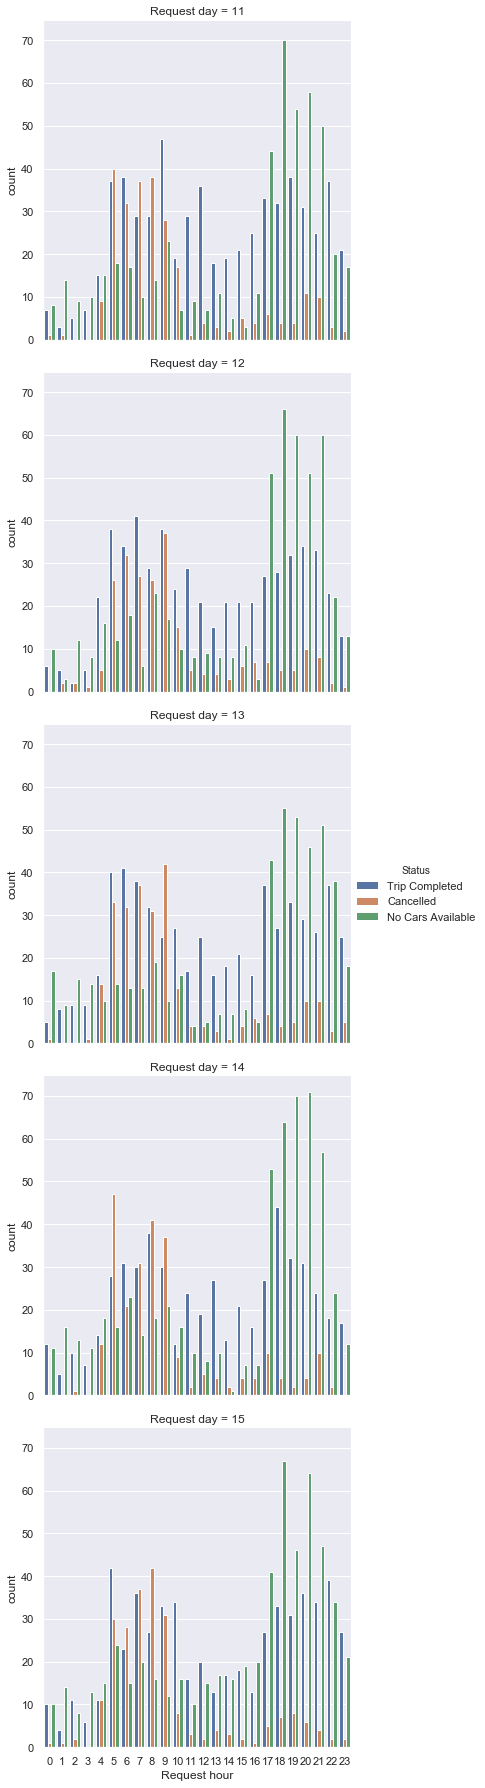

In [92]:
# In the below plot, each plot is for every request day i.e. 11, 12, 13 and so on
# Within each plot the x-axis contains the hour at which request was received and the bars are separated according to the Status
# i.e Trip completed, cancelled or 'no cars available

# We see from the plot that the evening time i.e. 18:00 to 21:00 is the time when mostly cars are not available
# Moreover in the morning time i.e. 5:00 to 9:00 most of the rides have been cancelled on most of these days
sns.catplot(x = "Request hour", hue = "Status", row = "Request day", data = finalDf, kind = "count")

F:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 2520x1800 with 0 Axes>

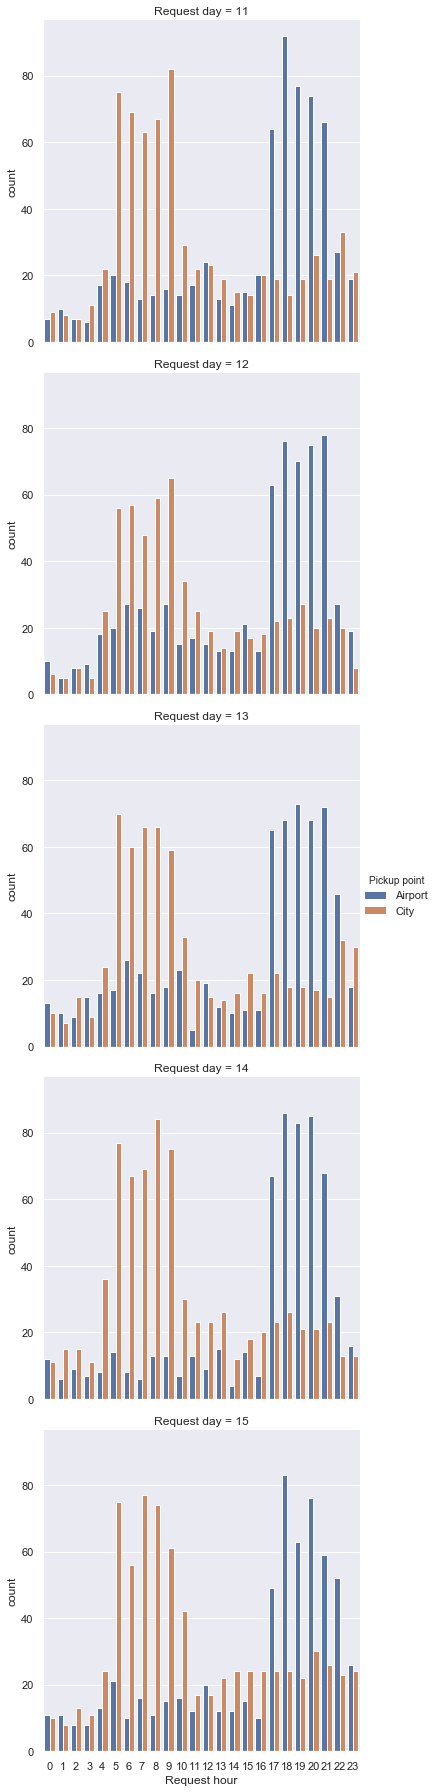

In [33]:
# Here we draw another factor plot of hour and day with different coloured bars showing us the 'pickup point'
#As we see in the plot below there is a huge demand and supply gap
# If we consider the hours 11 to 15 there is a balancing of request from both the sides i.e. the airport to city as well as
# city to airport but if we see in the morning hours and evening hours in which most of the rides have been cancelled or no 
# cabs were available this is the reason that requests from airport to city and city to airport do not balance each other and
# are vastly different
# Let's explore in more detail by seeing other plots
plt.figure(figsize=(35,25))
sns.factorplot(x = "Request hour", hue = "Pickup point", row = "Request day", data = finalDf, kind = "count")

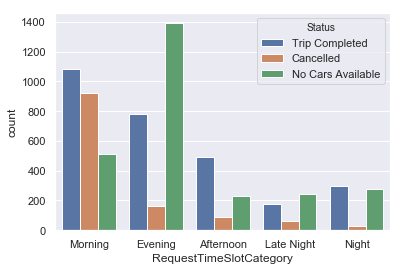

In [93]:
# The below plots shows us the overall picture of the request received i.e. both from airport to city and city to airport and shows
# that most of the 'No cars availabe' is in the evening slot and 
# most of the 'Cancelled' rides are in the morning
sns.countplot(x = 'RequestTimeSlotCategory', hue = 'Status', data = finalDf)

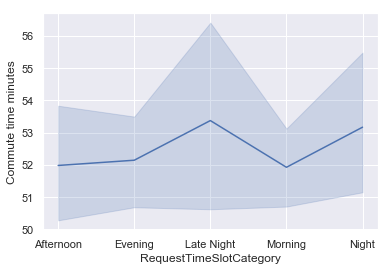

In [94]:
# The below plot shows us the commute time in different time slots i.e. 'late night', 'evening', etc..
# As we see the highest time to commute from airpot to city is at 'late night' and minimum is at morning and afternoon
airportToCity = finalDf.loc[finalDf['Pickup point']=='Airport']
sns.lineplot(x="RequestTimeSlotCategory", y="Commute time minutes",data=airportToCity)

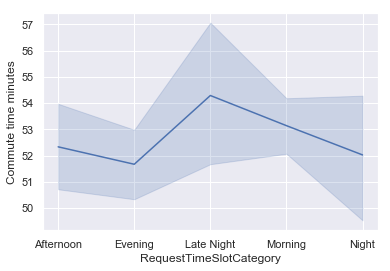

In [96]:
# The below plot shows us the commute time in different time slots i.e. 'late night', 'evening', etc..
# As we see the highest time to commute from city to airport is at 'late night' and minimum is in the evening
cityToAirport = finalDf.loc[finalDf['Pickup point']=='City']
sns.lineplot(x="RequestTimeSlotCategory", y="Commute time minutes",data=cityToAirport)

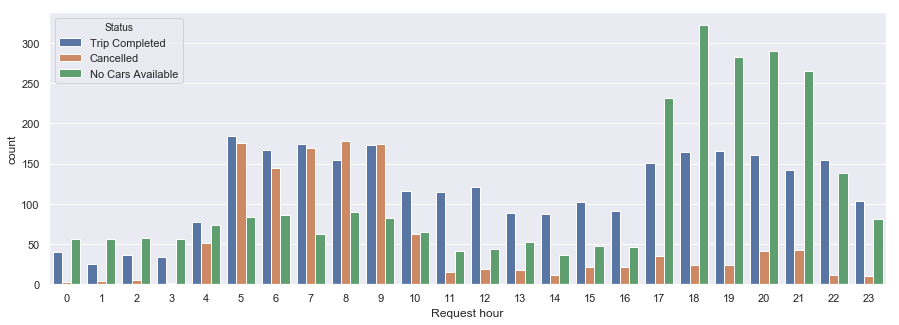

In [98]:
# The below plot shows the number of requests received every hour and their corresponding status
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
sns.countplot(x = 'Request hour', hue = 'Status', data = finalDf)

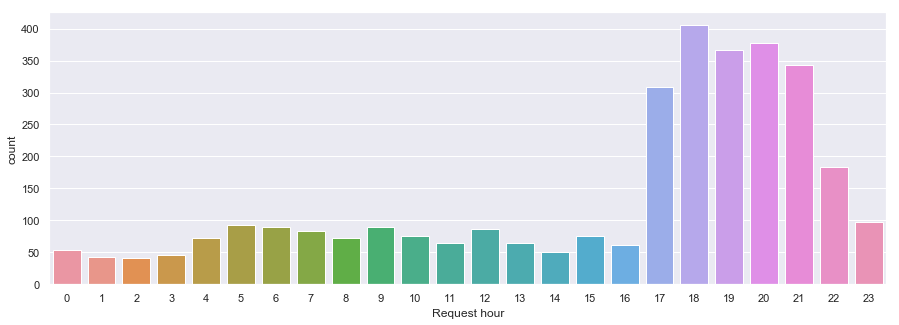

In [99]:
#Hourly request rate to go from airport to city
plt.figure(figsize=(15,5))
airportToCityDf = finalDf.loc[finalDf['Pickup point']=='Airport']
sns.countplot(x = 'Request hour',data = airportToCityDf)

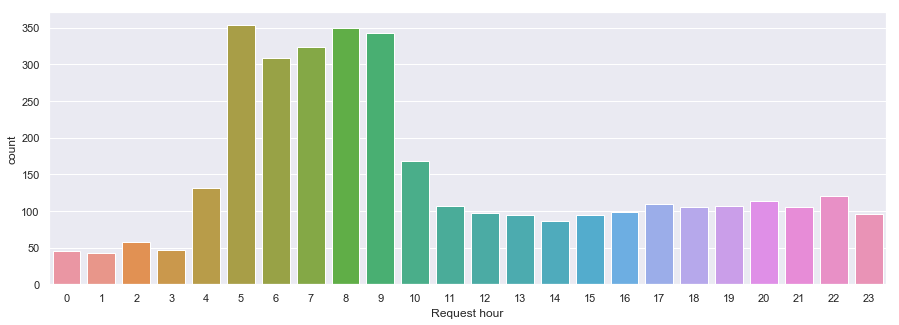

In [100]:
#Hourly request rate to go from city to airport
plt.figure(figsize=(15,5))
cityToAirportDf = finalDf.loc[finalDf['Pickup point']=='City']
sns.countplot(x = 'Request hour',data = cityToAirportDf)

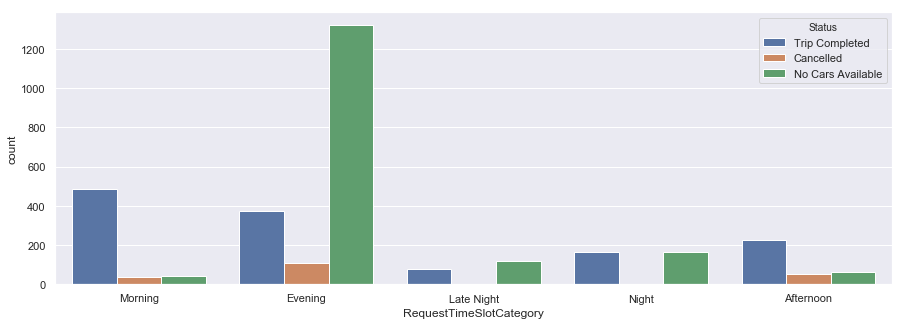

In [104]:
#Airport to City Requests being received based on Time slot category
plt.figure(figsize = (15,5))
sns.countplot(x = 'RequestTimeSlotCategory', hue = 'Status', data = airportToCityDf)

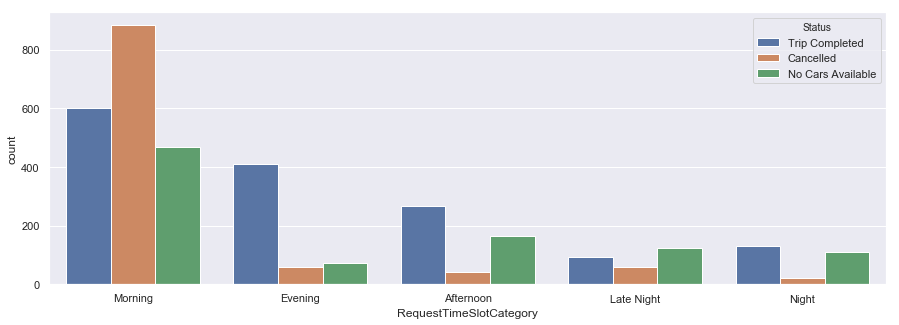

In [105]:
#City to airport Requests being received based on Time slot category and their status
plt.figure(figsize = (15,5))
sns.countplot(x = 'RequestTimeSlotCategory', hue = 'Status', data = cityToAirportDf)

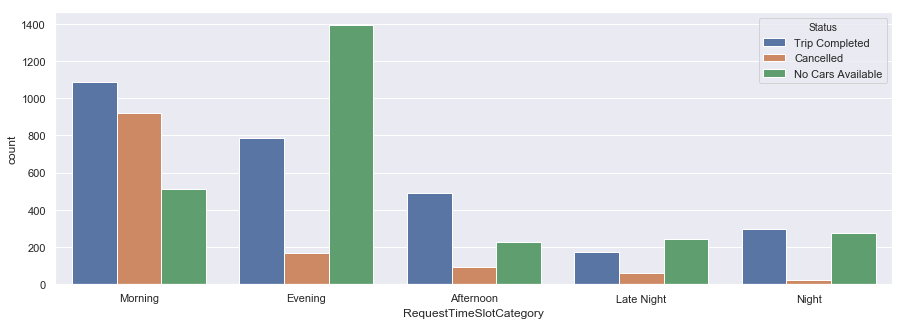

In [106]:
#Overall equests being received based on Time slot category and their status
plt.figure(figsize=(15,5))
sns.countplot(x = 'RequestTimeSlotCategory', hue = 'Status', data = finalDf)

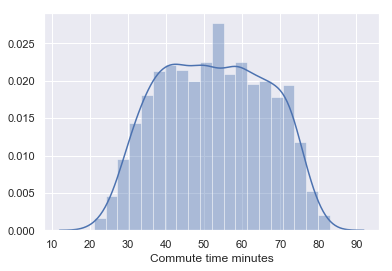

In [108]:
# The below plot shows most of the commute time from airport to city or city to airport is 52 mins approx.
DfWithValidCommuteTime = finalDf.loc[~pd.isnull(finalDf['Commute time minutes'])]
testDf
sns.distplot(DfWithValidCommuteTime['Commute time minutes'])

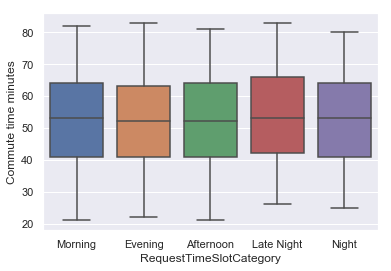

In [107]:
# The below box plot shows that the commute time is highest at night and if we see the mean of the commute time
# at each time slot then its almost similar
sns.boxplot(y = 'Commute time minutes', x= 'RequestTimeSlotCategory', data = finalDf)